In [64]:
# a simple autoencoder based on a fully-connected layer

In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5

235/235 [==============================] - 4s 12ms/step - loss: 0.2798 - val_loss: 0.1930
Epoch 2/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1711 - val_loss: 0.1521
Epoch 3/5
235/235 [==============================] - 3s 11ms/step - loss: 0.1434 - val_loss: 0.1327
Epoch 4/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1276 - val_loss: 0.1200
Epoch 5/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1170 - val_loss: 0.1115


In [6]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


In [7]:
import matplotlib.pyplot as plt

def plot_autoencoder_outputs(autoencoder, n, dims):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        decoded_imgs = autoencoder.predict(x_test)  # Assuming x_test is available
        plt.imshow(decoded_imgs[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

313/313 [==============================] - 1s 2ms/step


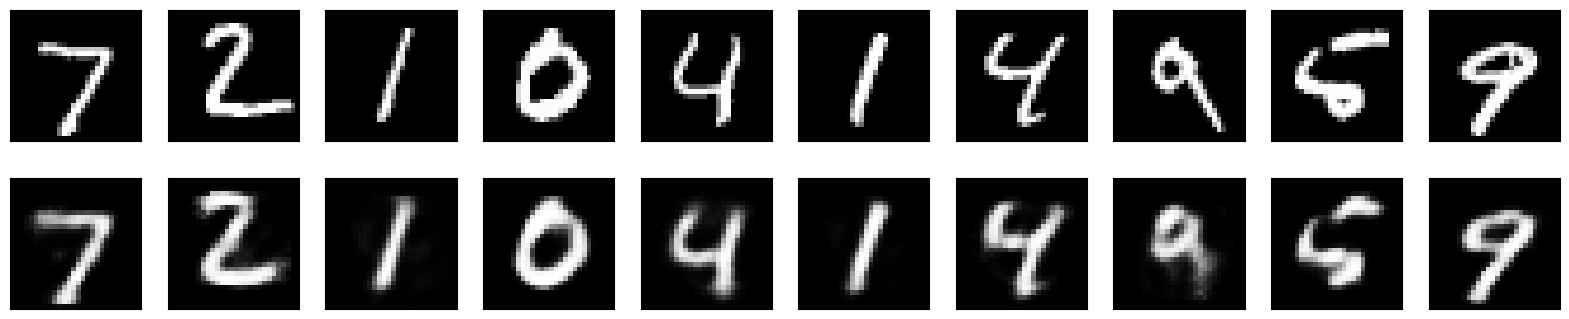

In [8]:
plot_autoencoder_outputs(autoencoder, 10, (28, 28))

In [9]:
def plot_loss(history):
    historydf = pd.DataFrame(history.history)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])

def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    min_epoch = len(history_list[0].epoch)
    losses = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h))
        min_epoch = min(min_epoch, len(history.epoch))
        losses.append(h['loss'][-1])

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx
    
    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0, 1), ax=ax)
    plt.title("Training Loss: " + ' vs '.join([str(round(x, 3)) for x in losses]))
    
    if plot_accuracy:
        ax = plt.subplot(212)
        if 'acc' in historydf.xs('acc', axis=1, level='metric').columns:
            historydf.xs('acc', axis=1, level='metric').plot(ylim=(0, 1), ax=ax)
            plt.title("Accuracy")
            plt.xlabel("Epochs")
    
    plt.xlim(0, min_epoch-1)
    plt.tight_layout()

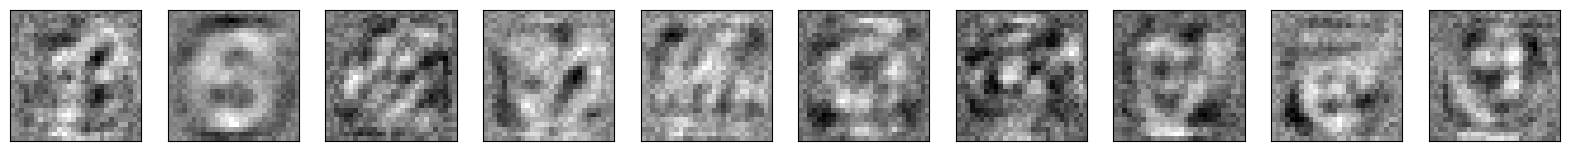

In [10]:
weights = autoencoder.get_weights()[0].T  # Replace 'your_autoencoder' with your actual autoencoder
n = 10

plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i + 0].reshape(28, 28))  # Adjust dimensions as needed
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [75]:
history_standard = autoencoder.fit(x_train, x_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1043
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0963
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0948
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0942
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0940
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0938
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0937
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0936
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0935
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0935
Epoch 11/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0934
Epoch 12/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0934


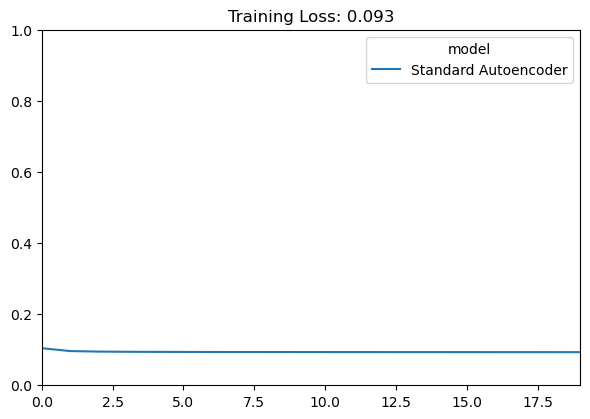

In [76]:
plot_compare_histories([history_standard], 
                       ['Standard Autoencoder'], plot_accuracy=False)

313/313 [==============================] - 1s 2ms/step
5.759183
313/313 [==============================] - 1s 2ms/step


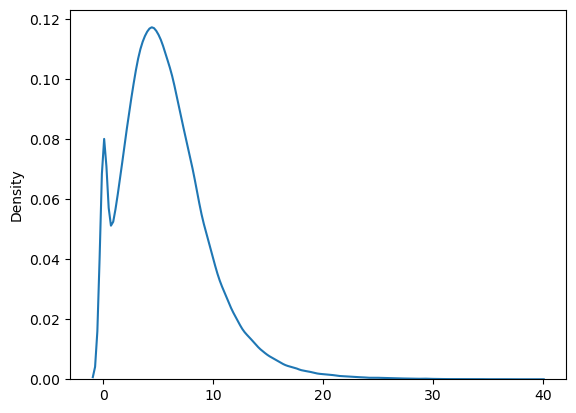

In [11]:
# Evaluate the autoencoder
autoencoder.evaluate(x_test, x_test)

# Print the mean of encoded representations for your autoencoder
print(encoder.predict(x_test).mean())

# Get encoded representations for your autoencoder
encoded_scores = encoder.predict(x_test).ravel()

# Visualize the distribution of encoded representations
sns.distplot(encoded_scores, hist=False, label='autoencoder model')

plt.show()

In [19]:
# a sparse autoencoder

In [12]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

regularized_autoencoder = keras.Model(input_img, decoded)

In [13]:
regularized_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
regularized_autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 4s 11ms/step - loss: 0.2833 - val_loss: 0.1987
Epoch 2/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1800 - val_loss: 0.1627
Epoch 3/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1536 - val_loss: 0.1433
Epoch 4/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1390 - val_loss: 0.1325
Epoch 5/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1299 - val_loss: 0.1249


313/313 [==============================] - 1s 2ms/step


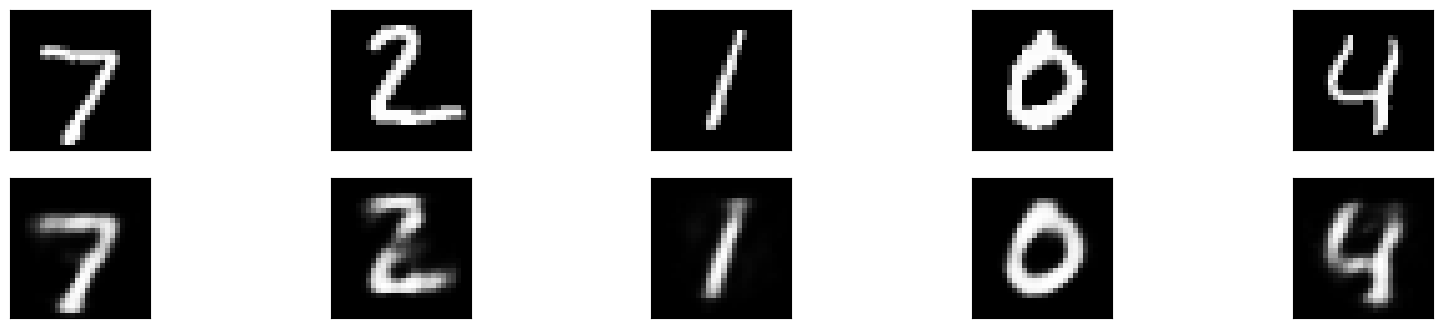

In [15]:
plot_autoencoder_outputs(regularized_autoencoder, 5, (28, 28))

In [81]:
history_regularized = regularized_autoencoder.fit(x_train, x_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1146
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1072
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1051
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1038
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1029
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1022
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1017
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1012
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1008
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1005
Epoch 11/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1002
Epoch 12/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1000
E

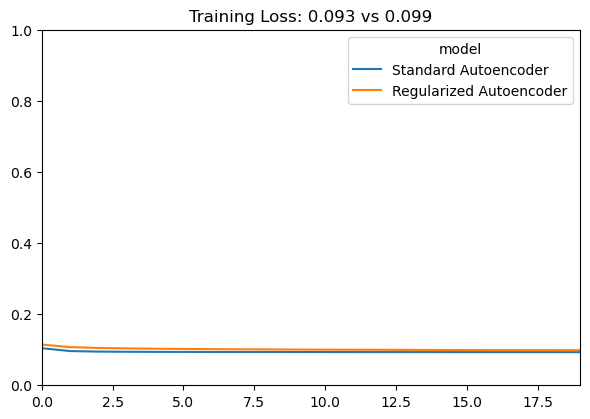

In [82]:
plot_compare_histories([history_standard, history_regularized], 
                       ['Standard Autoencoder', 'Regularized Autoencoder'], plot_accuracy=False)

313/313 [==============================] - 1s 2ms/step
5.759183
313/313 [==============================] - 1s 3ms/step


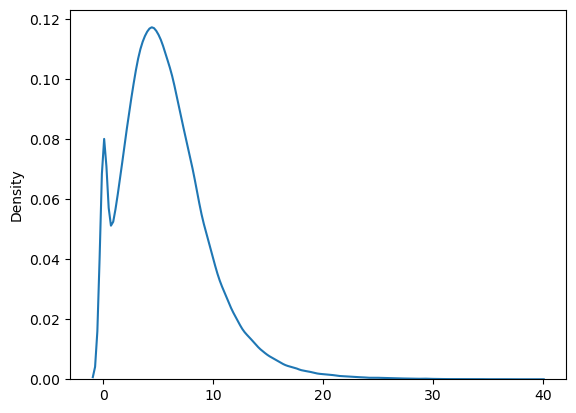

In [16]:
# Evaluate the autoencoder
regularized_autoencoder.evaluate(x_test, x_test)

# Print the mean of encoded representations for your autoencoder
print(encoder.predict(x_test).mean())

# Get encoded representations for your autoencoder
encoded_scores = encoder.predict(x_test).ravel()

# Visualize the distribution of encoded representations
sns.distplot(encoded_scores, hist=False, label='regularized_autoencoder model')

plt.show()

In [26]:
# Deep autoencoder

In [27]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [28]:
deep_autoencoder = keras.Model(input_img, decoded)
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

deep_autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 7s 10ms/step - loss: 0.2094 - val_loss: 0.1433
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1333 - val_loss: 0.1240
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1204 - val_loss: 0.1142
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1120 - val_loss: 0.1074
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1071 - val_loss: 0.1041
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1038 - val_loss: 0.1010
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1010 - val_loss: 0.0990
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0987 - val_loss: 0.0968
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0968 - val_loss: 0.0950
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0953 - val_lo

313/313 [==============================] - 1s 3ms/step


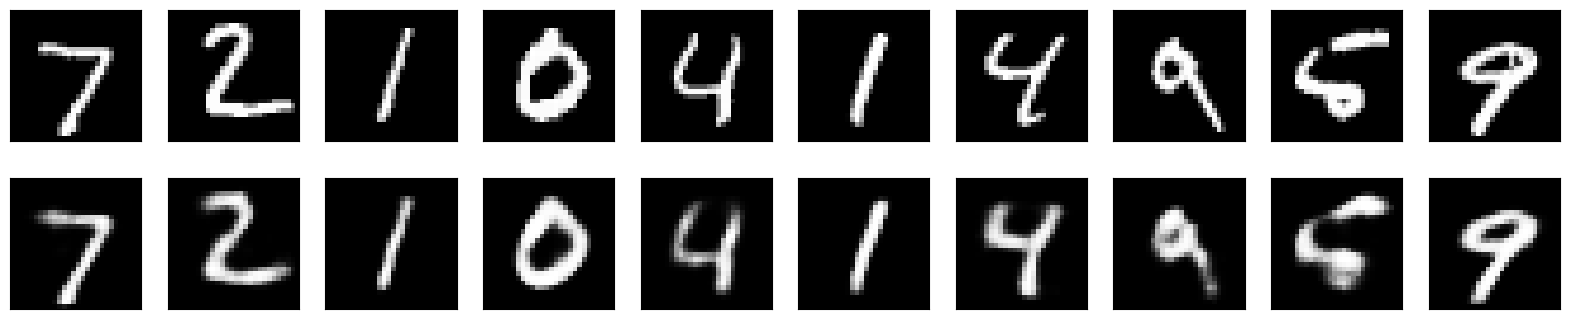

In [29]:
plot_autoencoder_outputs(deep_autoencoder, 10, (28, 28))

In [30]:
history_deep = deep_autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0963
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0937
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0922
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0909
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0898
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0888
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0882
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0876
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0871
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0867


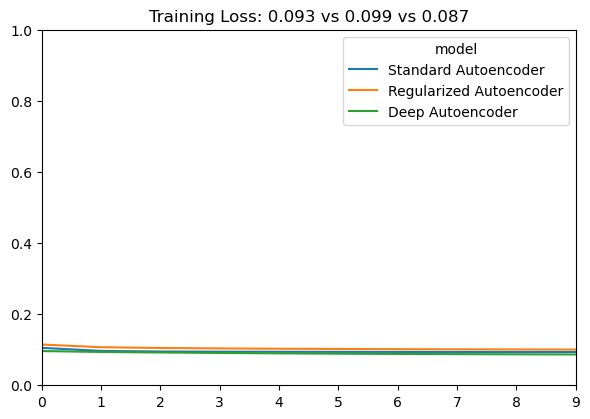

In [31]:
plot_compare_histories([history_standard, history_regularized, history_deep], 
                       ['Standard Autoencoder', 'Regularized Autoencoder','Deep Autoencoder'], plot_accuracy=False)

In [32]:
#Convolutional autoencoder

In [33]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [34]:
convolutional_autoencoder = keras.Model(input_img, decoded)

In [35]:
convolutional_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [36]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [37]:
from keras.callbacks import TensorBoard

convolutional_autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/5
469/469 [==============================] - 26s 51ms/step - loss: 0.2180 - val_loss: 0.1526
Epoch 2/5
469/469 [==============================] - 27s 57ms/step - loss: 0.1408 - val_loss: 0.1302
Epoch 3/5
469/469 [==============================] - 27s 57ms/step - loss: 0.1263 - val_loss: 0.1207
Epoch 4/5
469/469 [==============================] - 27s 57ms/step - loss: 0.1187 - val_loss: 0.1147
Epoch 5/5
469/469 [==============================] - 25s 54ms/step - loss: 0.1142 - val_loss: 0.1113


313/313 [==============================] - 3s 9ms/step


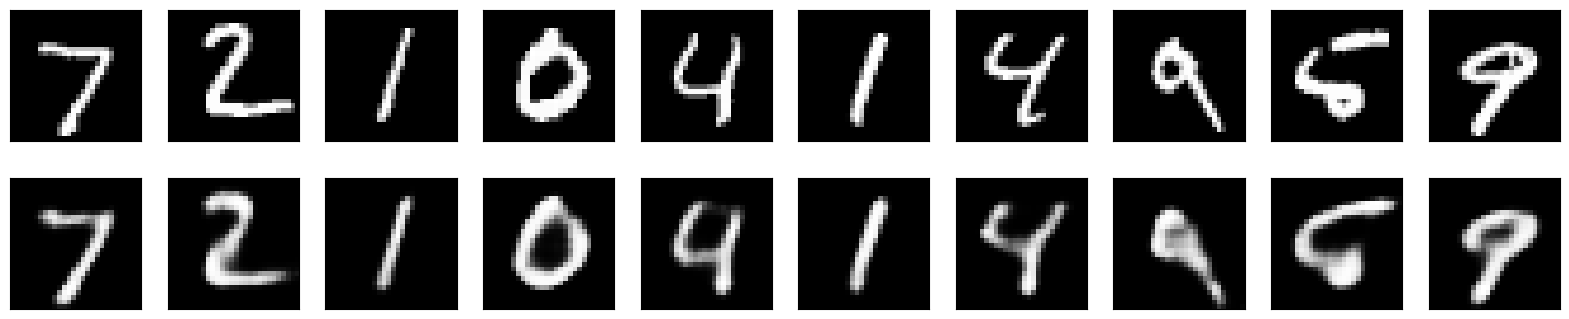

In [38]:
plot_autoencoder_outputs(convolutional_autoencoder, 10, (28, 28))

In [39]:
history_convolutional = convolutional_autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1100
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1058
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1032
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1013
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0996
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0983
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0972
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0963
Epoch 9/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0955
Epoch 10/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0948


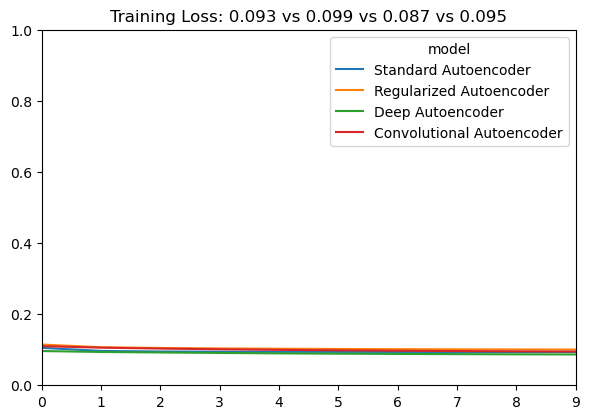

In [40]:
plot_compare_histories([history_standard, history_regularized, history_deep, history_convolutional], 
                       ['Standard Autoencoder', 'Regularized Autoencoder','Deep Autoencoder', 'Convolutional Autoencoder'], plot_accuracy=False)

In [17]:
# We can also have a look at the 128-dimensional encoded representations. These representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images.

313/313 [==============================] - 2s 5ms/step


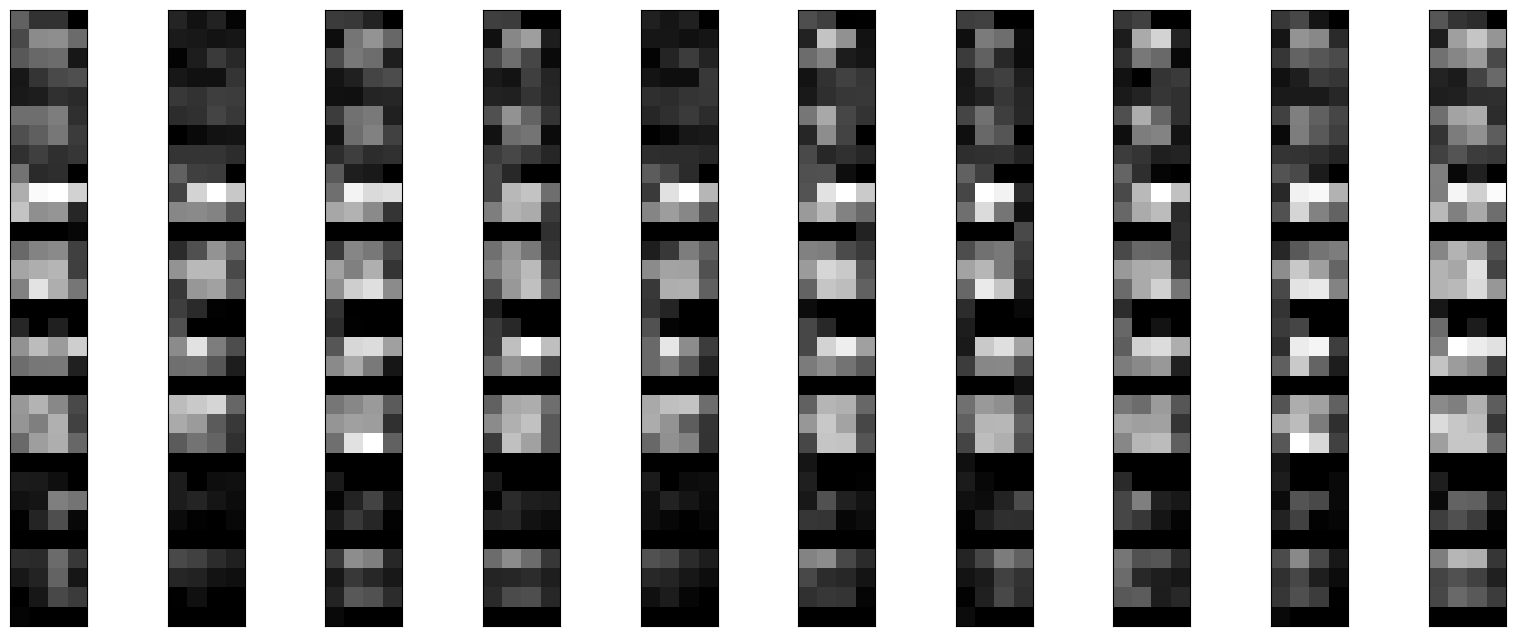

In [41]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [42]:
# Application to image denoising

In [43]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

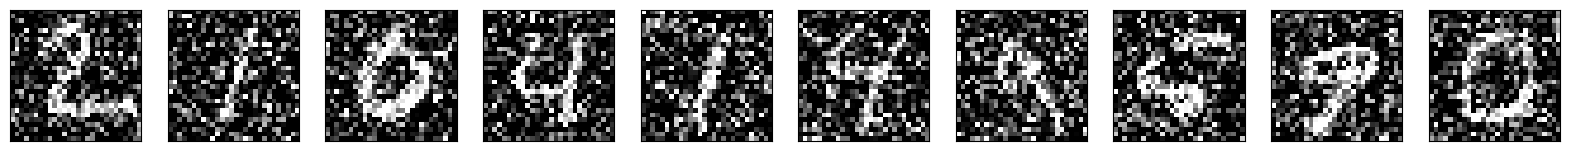

In [44]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [45]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

noise_autoencoder = keras.Model(input_img, decoded)
noise_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [46]:
noise_autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/10
469/469 [==============================] - 65s 134ms/step - loss: 0.1683 - val_loss: 0.1194
Epoch 2/10
469/469 [==============================] - 65s 139ms/step - loss: 0.1157 - val_loss: 0.1101
Epoch 3/10
469/469 [==============================] - 46s 99ms/step - loss: 0.1091 - val_loss: 0.1058
Epoch 4/10
469/469 [==============================] - 47s 100ms/step - loss: 0.1056 - val_loss: 0.1037
Epoch 5/10
469/469 [==============================] - 46s 97ms/step - loss: 0.1033 - val_loss: 0.1015
Epoch 6/10
469/469 [==============================] - 46s 97ms/step - loss: 0.1018 - val_loss: 0.1001
Epoch 7/10
469/469 [==============================] - 46s 97ms/step - loss: 0.1006 - val_loss: 0.0993
Epoch 8/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0999 - val_loss: 0.0987
Epoch 9/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0992 - val_loss: 0.0981
Epoch 10/10
469/469 [==============================] - 45s 96ms/step - loss: 0

313/313 [==============================] - 5s 15ms/step


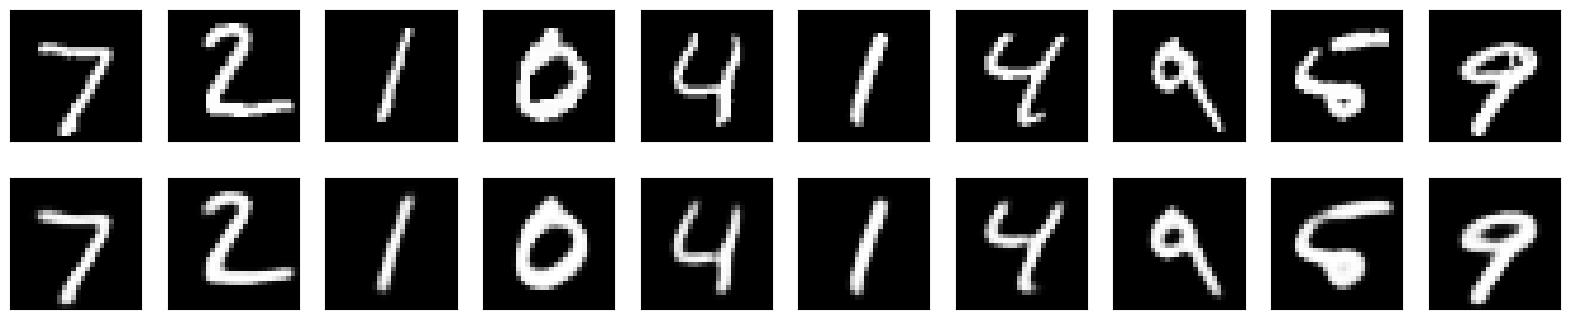

In [47]:
plot_autoencoder_outputs(noise_autoencoder, 10, (28, 28))

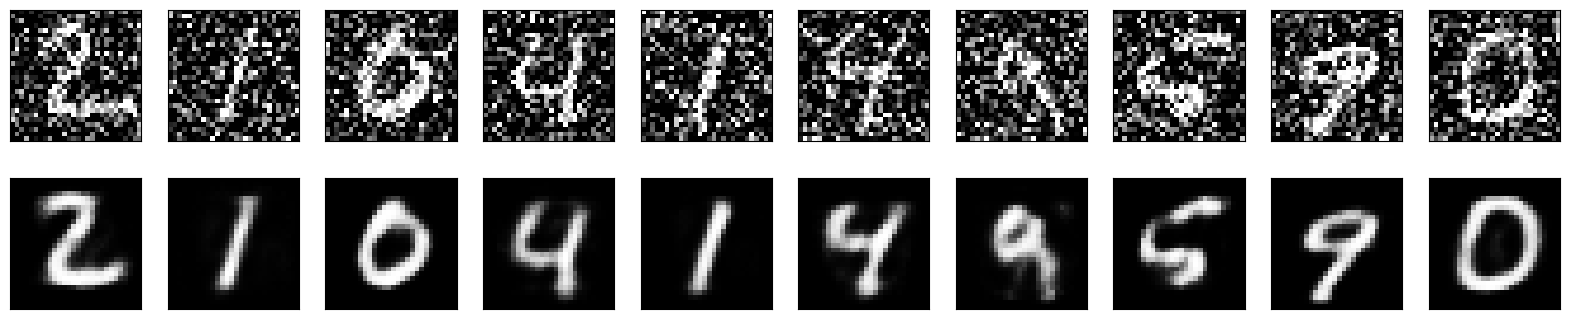

In [48]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [49]:
 # Variational autoencoder (VAE)

In [50]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [51]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [52]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [53]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [54]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 187.5434 - val_loss: 167.1023
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 164.5217 - val_loss: 162.9810
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 161.5684 - val_loss: 160.7563
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 159.4762 - val_loss: 158.6145
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 157.5399 - val_loss: 156.8376
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 155.8855 - val_loss: 155.4802
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 154.5595 - val_loss: 154.2887
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 153.5617 - val_loss: 153.3535
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 152.7860 - val_loss: 152.6766
Epoch 10/10
1875/1875 [==============

313/313 [==============================] - 2s 5ms/step


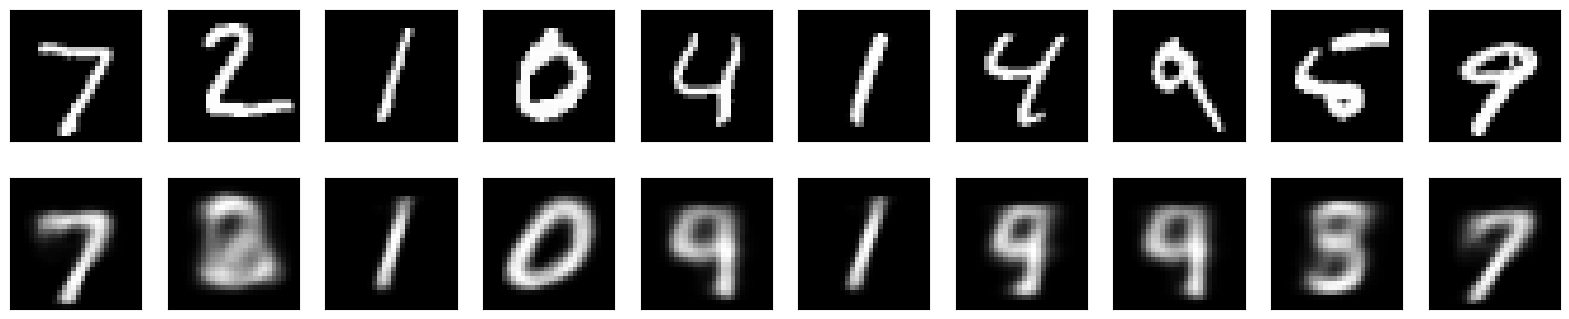

In [55]:
plot_autoencoder_outputs(vae, 10, (28, 28))

In [56]:
# Vanilla Autoencoder

In [57]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [58]:
# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
ae = keras.Model(input_img, decoded)

In [59]:
# Vanilla Autoencoder
vanilla_encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
vanilla_decoded = layers.Dense(784, activation='sigmoid')(vanilla_encoded)
vanilla_autoencoder = keras.Model(input_img, vanilla_decoded)


vanilla_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [60]:
vanilla_autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 4s 13ms/step - loss: 0.2773 - val_loss: 0.1912
Epoch 2/5
235/235 [==============================] - 3s 12ms/step - loss: 0.1707 - val_loss: 0.1522
Epoch 3/5
235/235 [==============================] - 3s 14ms/step - loss: 0.1430 - val_loss: 0.1325
Epoch 4/5
235/235 [==============================] - 3s 15ms/step - loss: 0.1274 - val_loss: 0.1202
Epoch 5/5
235/235 [==============================] - 3s 14ms/step - loss: 0.1172 - val_loss: 0.1119


313/313 [==============================] - 1s 3ms/step


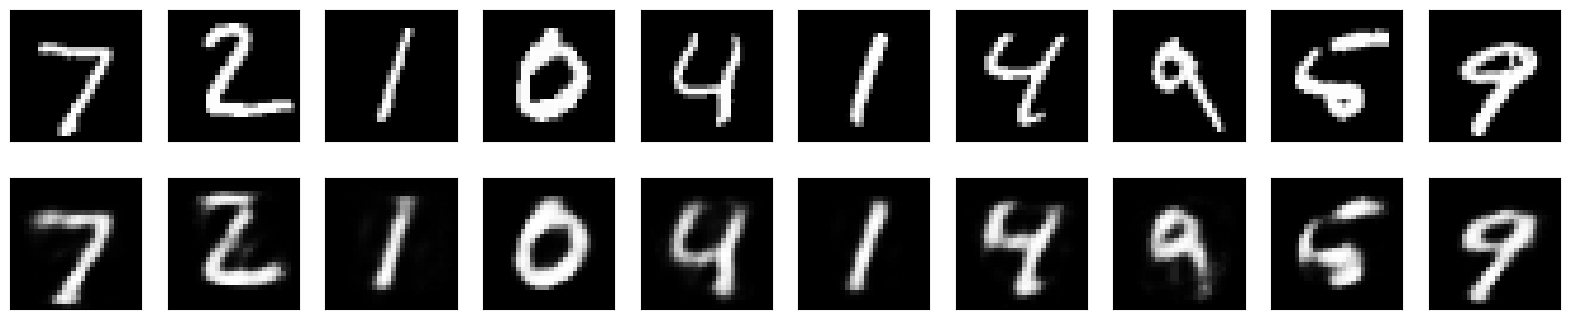

In [61]:
plot_autoencoder_outputs(vanilla_autoencoder, 10, (28, 28))

In [62]:
history_vanilla = vanilla_autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1033
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0963
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0951
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0945
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0942
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0940
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0939
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0937
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0936
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0935


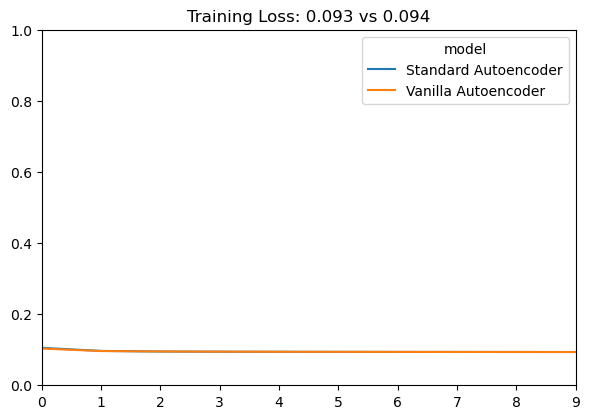

In [63]:
plot_compare_histories([history_standard, history_vanilla], 
                       ['Standard Autoencoder', 'Vanilla Autoencoder'], plot_accuracy=False)